In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop(columns=['is_hazardous', 'name', 'neo_id', 'orbiting_body'])
y = data['is_hazardous']


In [15]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Dropping rows with missing values
cleaned_data = data.dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the target classes 
balanced_data = resample(cleaned_data, replace=True, n_samples=len(cleaned_data), random_state=21)

# Splitting the data
X_balanced = balanced_data.drop(columns=['is_hazardous', 'name', 'neo_id', 'orbiting_body'])
y_balanced = balanced_data['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=21)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


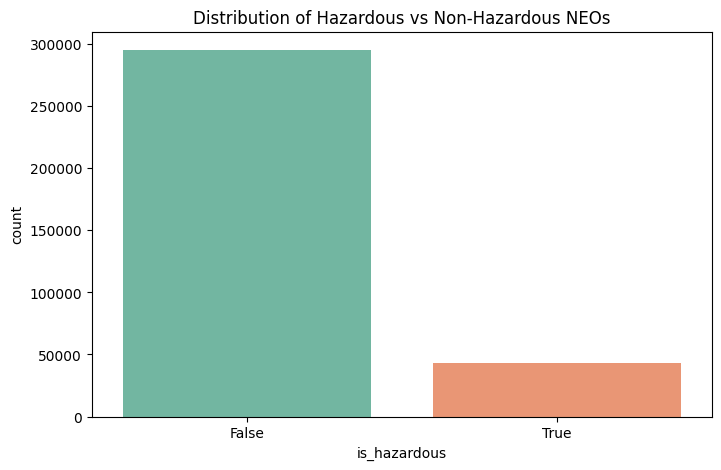

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


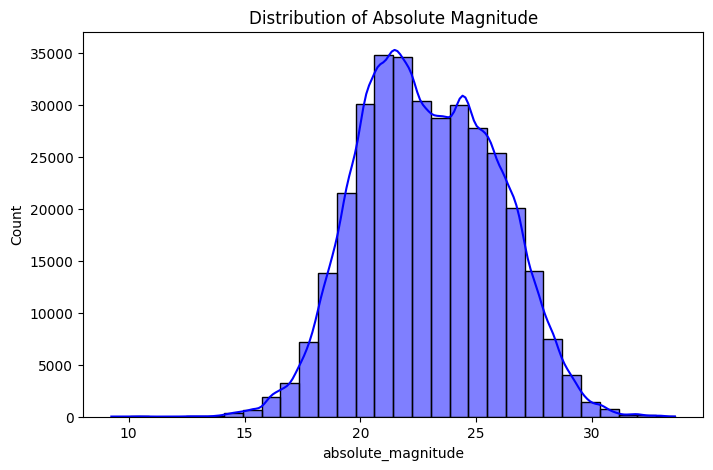

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-pa

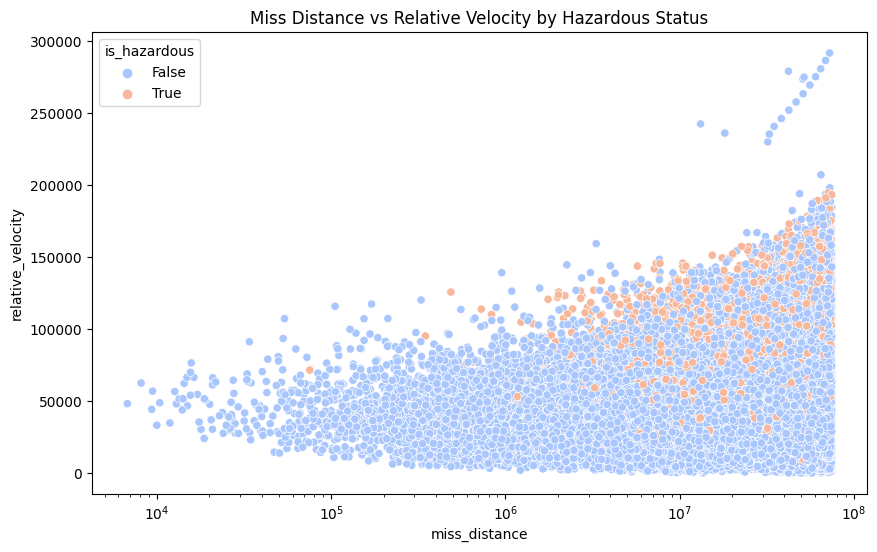

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of 'is_hazardous'
plt.figure(figsize=(8, 5))
sns.countplot(x='is_hazardous', data=cleaned_data, palette='Set2')
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

# Plot 2: Distribution of 'absolute_magnitude'
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data['absolute_magnitude'], kde=True, bins=30, color='blue')
plt.title('Distribution of Absolute Magnitude')
plt.show()

# Plot 3: Miss Distance vs Relative Velocity by Hazardous Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miss_distance', y='relative_velocity', hue='is_hazardous', data=cleaned_data, palette='coolwarm')
plt.title('Miss Distance vs Relative Velocity by Hazardous Status')
plt.xscale('log')
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(random_state=21)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

print("Selected Features by RFE:", X.columns[rfe.support_])


Selected Features by RFE: Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Randomized Search for Decision Tree
tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
tree = RandomizedSearchCV(DecisionTreeClassifier(random_state=21), tree_params, n_iter=5, cv=5, n_jobs=-1, random_state=21)
tree.fit(X_train, y_train)

# Randomized Search for Random Forest
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 15, 20]}
forest = RandomizedSearchCV(RandomForestClassifier(random_state=21), forest_params, n_iter=5, cv=5, n_jobs=-1, random_state=21)
forest.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20],
                                        'n_estimators': [50, 100, 200]},
                   random_state=21)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Logistic Regression Cross-validation
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression CV Accuracy: {logreg_cv_scores.mean()}")

# Decision Tree Cross-validation
tree_cv_scores = cross_val_score(tree.best_estimator_, X_train, y_train, cv=5)
print(f"Decision Tree CV Accuracy: {tree_cv_scores.mean()}")

# Random Forest Cross-validation
forest_cv_scores = cross_val_score(forest.best_estimator_, X_train, y_train, cv=5)
print(f"Random Forest CV Accuracy: {forest_cv_scores.mean()}")

# Feature importance from Random Forest
importances = forest.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Feature Importance:\n", feature_importance_df.sort_values(by='Importance', ascending=False))

# Model Evaluation for Random Forest
y_pred_forest = forest.best_estimator_.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))

# Model Evaluation for Decision Tree
y_pred_tree = tree.best_estimator_.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Logistic Regression CV Accuracy: 0.8711510269081912
Decision Tree CV Accuracy: 0.894085390093224
Random Forest CV Accuracy: 0.9229973106999212
Feature Importance:
                   Feature  Importance
4           miss_distance    0.249629
3       relative_velocity    0.211337
2  estimated_diameter_max    0.190933
1  estimated_diameter_min    0.184232
0      absolute_magnitude    0.163870
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96     88394
        True       0.88      0.51      0.64     13058

    accuracy                           0.93    101452
   macro avg       0.90      0.75      0.80    101452
weighted avg       0.92      0.93      0.92    101452

Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94     88394
        True       0.72      0.31      0.44     13058

    accuracy                           0.